# Scanning The Operating Parameters

First we set up the FPE.

In [1]:
from tessfpe.dhu.fpe import FPE
from tessfpe.dhu.unit_tests import check_house_keeping_voltages
fpe1 = FPE(1, debug=False, preload=False, FPE_Wrapper_version='6.1.1')
print fpe1.version
if check_house_keeping_voltages(fpe1):
    print "Wrapper load complete. Interface voltages OK."

Observatory Simulator Version 1.6c - Oct  8 2015 11:55:03
Wrapper load complete. Interface voltages OK.


We now walk through setting each value from its high to its low.

In [2]:
data = []

for i in range(100,-1,-1):
    set_values = {}
    for k in range(len(fpe1.ops.address)):
        if fpe1.ops.address[k] is None:
            continue
        low = fpe1.ops.address[k].low
        high = fpe1.ops.address[k].high
        name = fpe1.ops.address[k].name
        set_values[name] = fpe1.ops.address[k].value = low + i / 100. * (high - low)
    fpe1.ops.send()
    data.append({"set values": set_values,
                 "measured values": fpe1.house_keeping["analogue"]})

In [3]:
fpe1.ops.heater_1_current = fpe1.ops.heater_2_current = fpe1.ops.heater_3_current = fpe1.ops.heater_3_current.low
fpe1.ops.send()

In [6]:
set_min_values = {}
set_max_values = {}
measured_min_values = {}
measured_max_values = {}
for datum in data:
    for k in range(len(fpe1.ops.address)):
        if fpe1.ops.address[k] is None:
            continue
        name = fpe1.ops.address[k].name
        if "offset" in name:
            continue
        if name not in measured_min_values or \
           measured_min_values[name] > datum["measured values"][name]:
            measured_min_values[name] = datum["measured values"][name]
        if name not in measured_max_values or \
           measured_max_values[name] < datum["measured values"][name]:
            measured_max_values[name] = datum["measured values"][name]
        if name not in set_min_values or \
           set_min_values[name] > datum["set values"][name]:
            set_min_values[name] = datum["set values"][name]
        if name not in set_max_values or \
           set_max_values[name] < datum["set values"][name]:
            set_max_values[name] = datum["set values"][name]

for k in range(len(fpe1.ops.address)):
    if fpe1.ops.address[k] is None:
        continue
    name = fpe1.ops.address[k].name
    if "offset" in name:
        continue
    unit = fpe1.ops.address[k].unit
    expected_low = fpe1.ops.address[k].low
    actual_minimum = measured_min_values[name]
    expected_high = fpe1.ops.address[k].high
    actual_maximum = measured_max_values[name]
    if expected_low < expected_high:
        actual_low = actual_minimum
        actual_high = actual_maximum
    else:
        actual_high = actual_minimum
        actual_low = actual_maximum
    
    print "{name}:".format(name = name)
    print "\tExpected Low: {expected_low} {unit}".format(expected_low=expected_low,
                                                         unit=unit)
    print "\tActual Low: {actual_low} {unit}".format(actual_low=actual_low,
                                                     unit=unit)
    print "\tExpected High: {expected_high} {unit}".format(expected_high=expected_high,
                                                            unit=unit)
    print "\tActual High: {actual_high} {unit}".format(actual_high=actual_high,
                                                       unit=unit)
    print

ccd1_output_gate:
	Expected Low: -8.0 V
	Actual Low: -7.97657775879 V
	Expected High: 4.0 V
	Actual High: 6.5419921875 V

ccd1_input_gate_1:
	Expected Low: -8.0 V
	Actual Low: -7.87637329102 V
	Expected High: 4.0 V
	Actual High: 6.42063903809 V

ccd1_input_gate_2:
	Expected Low: -8.0 V
	Actual Low: -7.85018920898 V
	Expected High: 4.0 V
	Actual High: 6.59436035156 V

ccd1_scupper:
	Expected Low: 0.0 V
	Actual Low: 0.0463256835938 V
	Expected High: 15.0 V
	Actual High: 16.5 V

ccd1_reset_drain:
	Expected Low: 0.0 V
	Actual Low: 0.0211486816406 V
	Expected High: 15.0 V
	Actual High: 16.5 V

ccd1_backside:
	Expected Low: 0.0 V
	Actual Low: 0.0151062011719 V
	Expected High: 5.0 V
	Actual High: 7.96398925781 V

ccd1_substrate:
	Expected Low: 0.0 V
	Actual Low: -0.367858886719 V
	Expected High: -50.0 V
	Actual High: -80.0280761719 V

ccd2_output_gate:
	Expected Low: -8.0 V
	Actual Low: -7.98110961914 V
	Expected High: 4.0 V
	Actual High: 6.29475402832 V

ccd2_input_gate_1:
	Expected Low: -8.

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [9]:
from collections import defaultdict

# Collect the set and measured values
X = defaultdict(list)
Y = defaultdict(list)
for datum in data:
    for name in datum['set values']:
        if name not in datum['measured values']:
            continue
        X[name].append(datum['set values'][name])
        Y[name].append(datum['measured values'][name])

In [12]:
def get_range_square(X,Y):
    return [min(X + Y)-1, max(X + Y)+1]

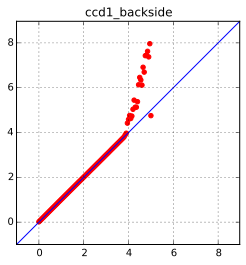

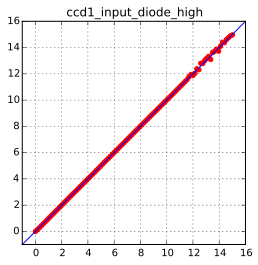

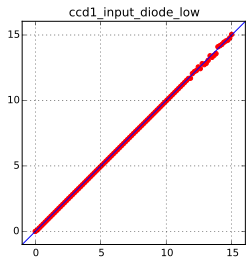

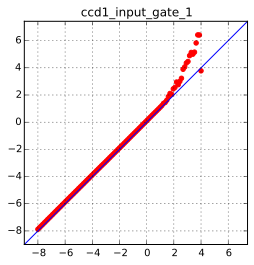

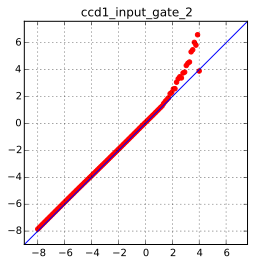

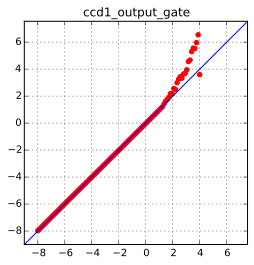

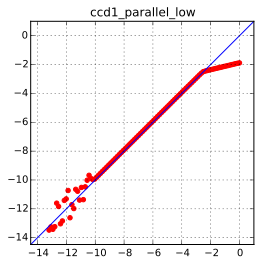

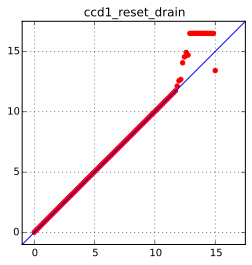

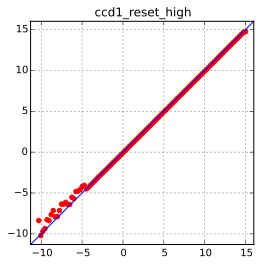

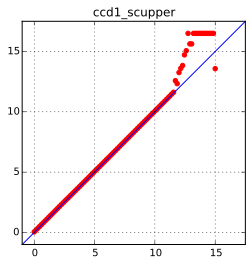

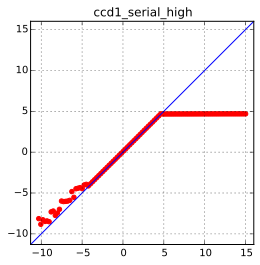

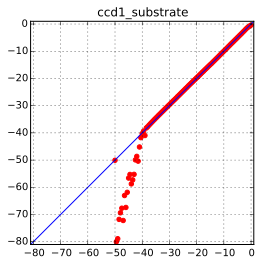

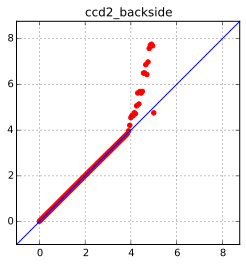

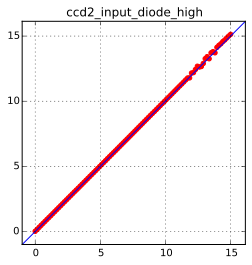

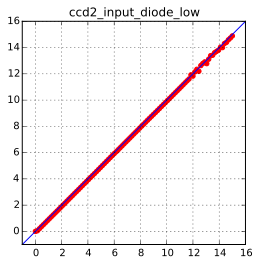

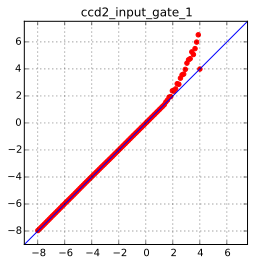

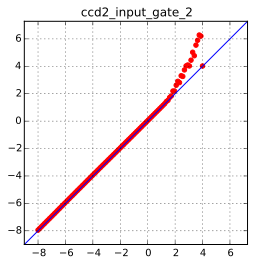

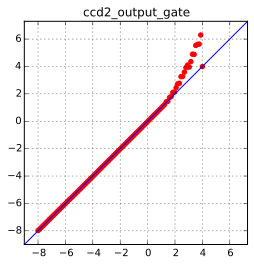

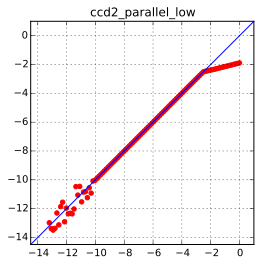

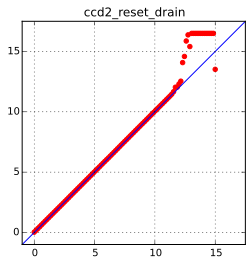

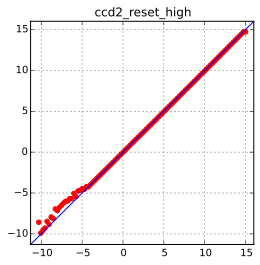

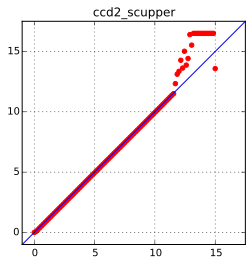

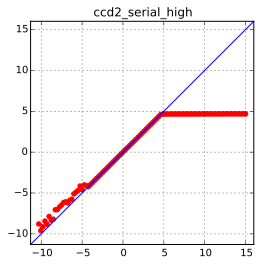

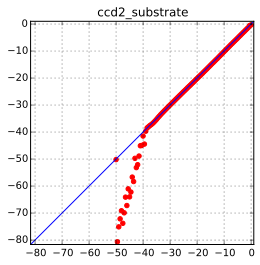

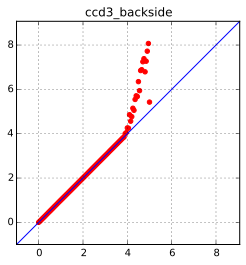

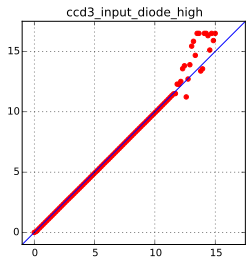

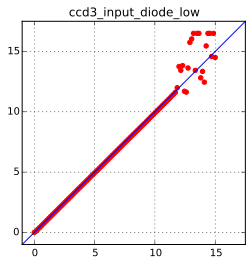

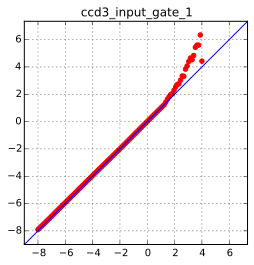

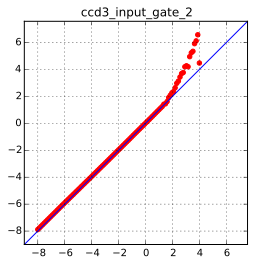

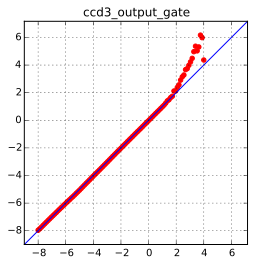

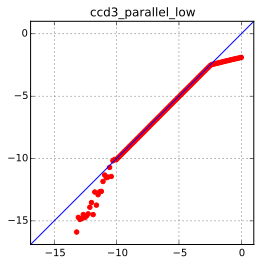

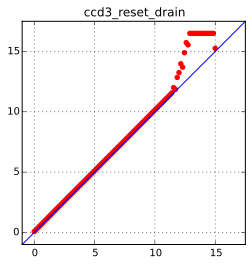

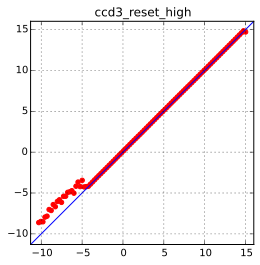

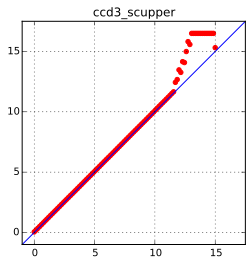

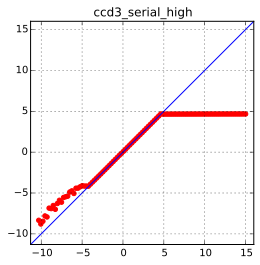

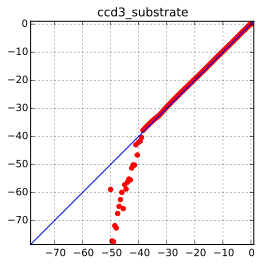

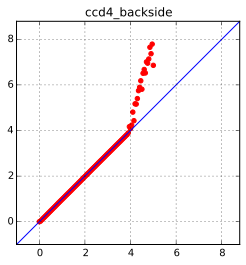

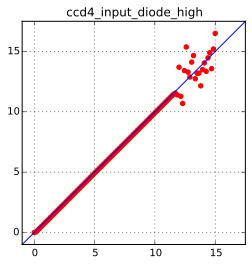

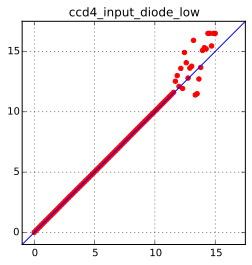

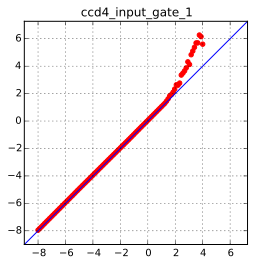

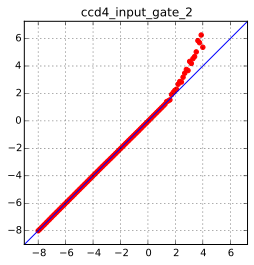

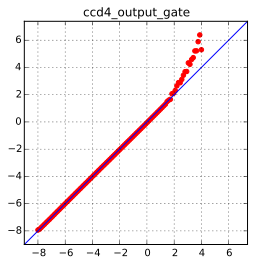

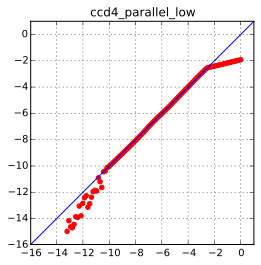

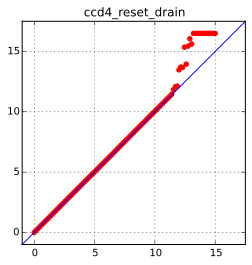

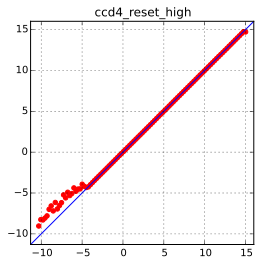

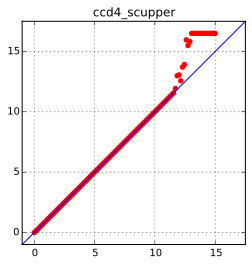

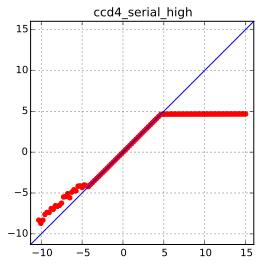

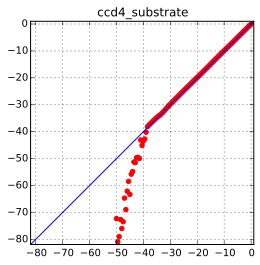

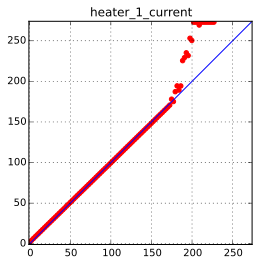

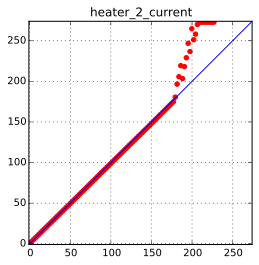

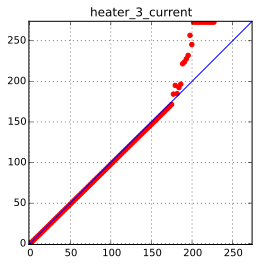

In [16]:
# Plot the set vs. measured values
for nom in sorted(X.keys()):
    x = X[nom]
    y = Y[nom]
    
    ran = get_range_square(x,y)
    pylab.ylim(ran)
    pylab.xlim(ran)
    plt.axes().set_aspect(1)
    plt.title(nom)
    plt.scatter(x,y,color='red')
    pylab.grid(True)
    minv,maxv=ran
    plt.plot(np.arange(minv,maxv+1),np.arange(minv,maxv+1))
    plt.show()